# Анализ по сегментам

- [Описание проекта](#project)
- [Описание исходных данных](#1)
- [Обработка данных](#2)
    - [Динамика продаж по сегментам «Россия»/«Не Россия»](#2.1)
    - [Retention пользователей России и других стран](#2.2)
    - [Ежемесячный доход core-игроков и обычных игроков](#2.3)
- [Отчет в Power BI](#total)


<a id='project'></a>

<b>Цель проекта</b>: 

Динамика продаж в игре Backscapes не устраивает компанию. В процессе обсуждения этой проблемы в команде разработки было принято решение первым делом изучить, как различные сегменты пользователей взаимодействуют с игрой. 
В этом проекте проводится исследование, отличаются ли продажи и retention пользователей из России от всех остальных пользователей, а также выделяются core-игроки. 

<b>Задачи</b>: 

1. Определить динамику продаж по сегментам «Россия»/«Не Россия».
2. Разобраться, отличается ли месячный retention пользователей России от пользователей из других стран.
3. Выделить core-игроков, а также посмотреть, насколько отличается ежемесячный доход с них в отличие от обычных игроков.
4. Визуализация в Power BI


In [1]:
import pandas as pd 
import psycopg2
import psycopg2.extras 
from datetime import datetime, timedelta
import numpy as np

<a id='1'></a>
# 1. Описание исходных данных


In [2]:
def get_users():
    query = '''
select * from gd2.users
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



users_df = pd.DataFrame(get_users())
print(users_df.info())
users_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50000 non-null  int64 
 1   last_sign_in_ip  49913 non-null  object
 2   phone            26560 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB
None


,id,last_sign_in_ip,phone
0,1886022,89.169.72.78,79645822598
1,2403464,37.98.248.114,None
2,367821,128.73.199.169,None
3,2019421,62.133.162.163,79625379259
4,1987320,217.118.83.176,79068740262
...,...,...,...
49995,2525785,2.61.126.201,None
49996,2525786,95.52.138.123,79121119073
49997,63555,213.87.225.90,None
49998,2532497,188.162.166.34,None


In [3]:
# PURCHASES

def get_purchases():
    query = '''
select * from gd2.purchases
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



purchases_df = pd.DataFrame(get_purchases())
print(purchases_df.info())
purchases_df





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3247 non-null   int64 
 1   user_id     3247 non-null   int64 
 2   created_at  3247 non-null   object
 3   state       3247 non-null   object
 4   amount      3247 non-null   object
dtypes: int64(2), object(3)
memory usage: 127.0+ KB
None


,id,user_id,created_at,state,amount
0,25178,103134,2019-11-02,successful,1573.494012
1,29373,51191,2019-11-03,successful,279.2173255
2,29795,127471,2019-11-08,successful,116.8132165
3,29006,118398,2019-11-13,successful,507.9949934
4,29608,126397,2019-11-19,successful,343.0768888
...,...,...,...,...,...
3242,305086,1123859,2020-06-30,successful,176.1709424
3243,306335,695792,2020-06-30,successful,1054.080962
3244,307724,1149959,2020-06-30,successful,343.9640287
3245,310366,788528,2020-06-30,successful,1453.760354


In [4]:
# addresses 

def get_addresses():
    query = '''
select * from gd2.addresses
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



addresses_df = pd.DataFrame(get_addresses())
print(addresses_df.info())
addresses_df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5000 non-null   int64 
 1   user_id      5000 non-null   int64 
 2   city         5000 non-null   object
 3   region_name  5000 non-null   object
 4   country      5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB
None


,id,user_id,city,region_name,country
0,15590,119414,Lyantor,Khanty-Mansiyskiy Avtonomnyy Okrug,Russia
1,15600,164276,Serpukhov,MO,Russia
2,15658,104254,Sovetsk,Kaliningrad,Russia
3,15674,103378,Sovetsk,Kaliningrad,Russia
4,15951,165137,Medvezh’yegorsk,Republic of Karelia,Russia
...,...,...,...,...,...
4995,303857,728064,Mānwat,Maharashtra,India
4996,317599,1153907,Laurel,Maryland,Liberia
4997,332809,778122,Villa Yapacaní,Santa Cruz,Argentina
4998,338992,208572,Rāipur,Chittagong,Bangladesh


In [5]:
# ip2location


def get_ip2location():
    query = '''
select * from gd2.ip2location
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



ip2location_df = pd.DataFrame(get_ip2location())
print(ip2location_df.info())
ip2location_df




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185126 entries, 0 to 185125
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ip_from       185126 non-null  int64 
 1   ip_to         185126 non-null  int64 
 2   country_code  185126 non-null  object
 3   country_name  185126 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.6+ MB
None


,ip_from,ip_to,country_code,country_name
0,0,16777215,-,-
1,16777216,16777471,US,United States
2,16777472,16778239,CN,China
3,16778240,16779263,AU,Australia
4,16779264,16781311,CN,China
...,...,...,...,...
185121,3758094336,3758095359,HK,Hong Kong
185122,3758095360,3758095871,CN,China
185123,3758095872,3758096127,SG,Singapore
185124,3758096128,3758096383,AU,Australia


<b>USERS</b>

В users хранятся данные по пользователям игры:

- id - id пользователя
- last_sign_in_ip - IP-адрес при последнем заходе в игру
- phone	- телефон пользователя

<b>PURCHASES</b>

purchases хранит данные по покупкам пользователей в игре. Связана с users по user_id связью «1 ко многим»:

- id - id покупки
- user_id -	id пользователя
- created_at - datetime покупки
- state - статус покупки: successful — удачная покупка; canceled — отмененная.
- amount - сумма покупки в рублях.

<b>ADDRESSES</b>

В таблице addresses хранится информация по каждому пользователю о том, в каком городе, регионе и стране он находится. Связана с users через user_id связью «1 к 1»

- id - id адреса
- user_id -	id юзера
- city - город
- region_name - название региона
- country - название страны

<b>IP2LOCATION</b>

ip2location хранит соответствие IP-адресов и стран. Каждая страна имеет несколько доступных ей диапазонов IP-адресов. Соответственно, зная IP-адрес пользователя, можно определить его страну нахождения.

- ip_from - начало диапазона IP-адресов в десятичной записи*
- ip_to - конец диапазона IP-адресов в десятичной записи*
- country_code - код страны
- country_name - название страны





<a id='2'></a>
# 2. Обработка данных

<a id='2.1'></a>
## 2.1 Динамика продаж по сегментам «Россия»/«Не Россия»

Первая задача состоит в том, чтобы определить динамику продаж по сегментам «Россия»/«Не Россия». Создадим таблицу с информацией о каждой покупке с датой и обозначением из какой страны пользователь, совершивший покупку. 

Как мы видим, у нас есть 3 источника определения географии пользователя: физический адрес, номер телефона и IP-адрес.

Введённый пользователем адрес имеет самую высокую точность, в то время как при определении IP-адреса могут быть серьезные погрешности, связанные, например, с изменением IP-адреса с помощью VPN.

Таким образом, алгоритм определения географии следующий:
1. Если известен физический адрес пользователя, то учитываем его. Если неизвестен, переходим к шагу 2.
2. Если известен номер телефона, используем его. Если неизвестен, переходим к шагу 3.
3. Если известен IP-адрес, используем его. Если неизвестен, значит, местоположение пользователя определить невозможно.



In [6]:
# ip2location


def get_purchases_per_countries():
    query = '''
with a as ( -- определяем географию (из россии или нет) по полю страна
select 
    u.id as user_id, 
    case when a.country = 'Russia'::text then 'yes'::text 
		when a.country is null then null
    else 'no' end as is_russia
from 
    gd2.users u 
left join gd2.addresses a on u.id = a.user_id ),

b as( -- определяем географию (из россии или нет) по номеру телефона
select 
    u.id as user_id, 
    case 
        when substring(u.phone from 1 for 1) = '7'::text
        and length(u.phone) = 11 then 'yes'::text
		when u.phone is null then null
        else 'no' 
    end as is_russia
from gd2.users u
),

rus_country_codes as ( -- фильтруем только российские диапазоны кодов
select
    * 
from 
    gd2.ip2location i 
where i.country_code in ('RU', '- ') ),

ip_dec as ( -- переводим ip в десятичный вид
 select 
    u.id as user_id, 
    (u.last_sign_in_ip::inet - '0.0.0.0'::inet) as user_ip_in_dec
from 
	gd2.users u
 ),

users_country_codes as ( -- создаем таблицу пользователей с их ip адресами в десятичном виде
select 
    ip_dec.user_id as user_id, 
    r.country_code
from 
    ip_dec 
join rus_country_codes r on ip_dec.user_ip_in_dec between r.ip_from and r.ip_to
),

c as ( -- определяем географию (из россии или нет) по ip адресу пользователя
select
    u.id as user_id,
    case 
        when ucc.country_code = 'RU' then 'yes'
        when ucc.country_code = '- ' then 'unknown'
        when u.last_sign_in_ip is null then 'unknown'
 	  else 'no'
        end 
    as is_russia
from 
    gd2.users u
left join users_country_codes ucc on u.id = ucc.user_id ),

users_with_geo as( -- Возвращает таблицу с отметкой из россии пользователь или нет
select 
    u.id as id,
    coalesce(a.is_russia, b.is_russia, c.is_russia) as is_russia  -- используем здесь coalesce потому что определение географии приорететнее определять сначала по наименованию страны, потом по номеру телефона и только потом по ip адресу
from 
    gd2.users u 
left join a on u.id = a.user_id
left join b on u.id = b.user_id
left join c on u.id = c.user_id),

-- Исключим пользователей у которых страна так и не определилась из дальнейшего анализа. Они составляют малый процент, поэтому, убрав их, мы не исказим результаты и заметно упростим жизнь.
users_with_geo_withaut_unknown as(
select
    *
from
    users_with_geo uwg 
where uwg.is_russia != 'unknown'),

-- выводим динамику продаж пользователей с указанием географии в зависимости от времени
purchases_per_countries as(
select 
    uwgwu.id as user_id, 
    uwgwu.is_russia as is_russia, 
    p.id as purch_id, 
    p.created_at as created_at, 
    p.state as state, 
    p.amount as amount
from 
    users_with_geo_withaut_unknown uwgwu
join gd2.purchases p on uwgwu.id = p.user_id
where 
    p.state = 'successful')


select * from purchases_per_countries
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



purchases_per_countries_df = pd.DataFrame(get_purchases_per_countries())
print(purchases_per_countries_df.info())
purchases_per_countries_df.to_csv('purchases_per_countries.csv', index = False)
purchases_per_countries_df





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3123 non-null   int64 
 1   is_russia   3123 non-null   object
 2   purch_id    3123 non-null   int64 
 3   created_at  3123 non-null   object
 4   state       3123 non-null   object
 5   amount      3123 non-null   object
dtypes: int64(2), object(4)
memory usage: 146.5+ KB
None


,user_id,is_russia,purch_id,created_at,state,amount
0,228188,yes,186457,2020-04-01,successful,266.204006
1,736721,no,299923,2020-06-25,successful,712.3746953
2,1151541,no,299917,2020-06-19,successful,740.0534318
3,270774,yes,263570,2020-05-10,successful,323.0216637
4,396332,yes,54791,2020-03-09,successful,274.9337243
...,...,...,...,...,...,...
3118,934758,no,274296,2020-05-26,successful,151.7286191
3119,109000,no,214558,2020-04-08,successful,745.5745836
3120,1096005,no,341309,2020-05-04,successful,839.415266
3121,1096005,no,260476,2020-05-04,successful,336.8783123


<a id='2.2'></a>
## Retention пользователей России и других стран

При расчете Retention будем считать возвращаемость от нулевого месяца (месяца регистрации когорты, в нашем случае это месяц первой покупки для пользователя).

В следующем запросе построим таблицу, в которой для каждой когорты (месяц первой покупки) определим все месяца покупок, в которые пользователи из данной когорты совершали покупки, количество покупателей в первый месяц,  количество покупателей в какой-либо другой последующий месяц и Retention этого месяца.  

Результаты сохраним для сегмента "Из России" и для сегмента "Не из России", они понадобятся для формирования отчета. 


In [7]:
# Россия

def get_cohorts_russia():
    query = '''
with a as ( -- определяем географию (из россии или нет) по полю страна
select 
    u.id as user_id, 
    case when a.country = 'Russia'::text then 'yes'::text 
		when a.country is null then null
    else 'no' end as is_russia
from 
    gd2.users u 
left join gd2.addresses a on u.id = a.user_id ),

b as( -- определяем географию (из россии или нет) по номеру телефона
select 
    u.id as user_id, 
    case 
        when substring(u.phone from 1 for 1) = '7'::text
        and length(u.phone) = 11 then 'yes'::text
		when u.phone is null then null
        else 'no' 
    end as is_russia
from gd2.users u
),

rus_country_codes as ( -- фильтруем только российские диапазоны кодов
select
    * 
from 
    gd2.ip2location i 
where i.country_code in ('RU', '- ') ),

ip_dec as ( -- переводим ip в десятичный вид
 select 
    u.id as user_id, 
    (u.last_sign_in_ip::inet - '0.0.0.0'::inet) as user_ip_in_dec
from 
	gd2.users u
 ),

users_country_codes as ( -- создаем таблицу пользователей с их ip адресами в десятичном виде
select 
    ip_dec.user_id as user_id, 
    r.country_code
from 
    ip_dec 
join rus_country_codes r on ip_dec.user_ip_in_dec between r.ip_from and r.ip_to
),

c as ( -- определяем географию (из россии или нет) по ip адресу пользователя
select
    u.id as user_id,
    case 
        when ucc.country_code = 'RU' then 'yes'
        when ucc.country_code = '- ' then 'unknown'
        when u.last_sign_in_ip is null then 'unknown'
 	  else 'no'
        end 
    as is_russia
from 
    gd2.users u
left join users_country_codes ucc on u.id = ucc.user_id ),

users_with_geo as( -- Возвращает таблицу с отметкой из россии пользователь или нет
select 
    u.id as id,
    coalesce(a.is_russia, b.is_russia, c.is_russia) as is_russia  -- используем здесь coalesce потому что определение географии приорететнее определять сначала по наименованию страны, потом по номеру телефона и только потом по ip адресу
from 
    gd2.users u 
left join a on u.id = a.user_id
left join b on u.id = b.user_id
left join c on u.id = c.user_id),

-- Исключим пользователей у которых страна так и не определилась из дальнейшего анализа. Они составляют малый процент, поэтому, убрав их, мы не исказим результаты и заметно упростим жизнь.
users_with_geo_withaut_unknown as(
select
    *
from
    users_with_geo uwg 
where uwg.is_russia != 'unknown'),

-- у каждого пользователя (для тех у которых смогли определить географию) выведем месяц первой покупки (смотрим только успешные). Фильтруем по географии (из России / остальные страны). 
first_purchases as 
(select 
    distinct p.user_id, 
    min(date_trunc ('month', p.created_at)) as first_month
from 
    gd2.purchases p 
join users_with_geo_withaut_unknown uwgwu on p.user_id = uwgwu.id
where
    p.state = 'successful'
    and uwgwu.is_russia = 'yes' -- Россия 
    --and uwgwu.is_russia = 'no' -- остальные страны 
group by 
    1 
order by 2 ),

all_purchases as -- Для каждого пользователя определяем месяца успешных покупок, фильтруем по географии (Россиия / другие страны). 
(select 
    distinct p.user_id,
    date_trunc ('month', p.created_at) as purch_month,
	f.first_month
from 
    gd2.purchases p 
join first_purchases f on p.user_id = f.user_id
	
join users_with_geo_withaut_unknown uwgwu on p.user_id = uwgwu.id
where
    p.state = 'successful'
    and uwgwu.is_russia = 'yes' -- Россия 
    --and uwgwu.is_russia = 'no' -- остальные страны
order by 1),

frst as ( -- Для каждой когорты определяем количество клиентов
select
    a.first_month,
    count(distinct a.user_id) as first_month_qnt
from 
    all_purchases a 
group by 1)

--cohort_table as (
select -- Итоговая таблица с retention для каждого месяца покупки
	a.first_month, 
	a.purch_month, 
	f.first_month_qnt,
	count(distinct a.user_id) as all_month_qnt,
	(count(distinct a.user_id)*1.0/f.first_month_qnt*1.0)*100 as retention
from 
    all_purchases a 
join frst f on f.first_month = a.first_month
group by 1,2,3
order by 1,2,3

    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



cohorts_russia_df = pd.DataFrame(get_cohorts_russia())
print(cohorts_russia_df.info())
cohorts_russia_df.to_csv('cohorts_russia.csv', index = False)
cohorts_russia_df






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   first_month      28 non-null     datetime64[ns, UTC]
 1   purch_month      28 non-null     datetime64[ns, UTC]
 2   first_month_qnt  28 non-null     int64              
 3   all_month_qnt    28 non-null     int64              
 4   retention        28 non-null     object             
dtypes: datetime64[ns, UTC](2), int64(2), object(1)
memory usage: 1.2+ KB
None


,first_month,purch_month,first_month_qnt,all_month_qnt,retention
0,2019-11-01 00:00:00+00:00,2019-11-01 00:00:00+00:00,8,8,100.000000000000000000000
1,2019-11-01 00:00:00+00:00,2019-12-01 00:00:00+00:00,8,1,12.500000000000000000000
2,2019-11-01 00:00:00+00:00,2020-03-01 00:00:00+00:00,8,2,25.000000000000000000000
3,2019-11-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,8,1,12.500000000000000000000
4,2019-11-01 00:00:00+00:00,2020-05-01 00:00:00+00:00,8,1,12.500000000000000000000
5,2019-12-01 00:00:00+00:00,2019-12-01 00:00:00+00:00,2,2,100.000000000000000000000
6,2019-12-01 00:00:00+00:00,2020-03-01 00:00:00+00:00,2,2,100.000000000000000000000
7,2019-12-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,2,1,50.000000000000000000000
8,2019-12-01 00:00:00+00:00,2020-05-01 00:00:00+00:00,2,1,50.000000000000000000000
9,2020-01-01 00:00:00+00:00,2020-01-01 00:00:00+00:00,9,9,100.000000000000000000000


In [8]:
# Другие страны

def get_cohorts_not_russia():
    query = '''
with a as ( -- определяем географию (из россии или нет) по полю страна
select 
    u.id as user_id, 
    case when a.country = 'Russia'::text then 'yes'::text 
		when a.country is null then null
    else 'no' end as is_russia
from 
    gd2.users u 
left join gd2.addresses a on u.id = a.user_id ),

b as( -- определяем географию (из россии или нет) по номеру телефона
select 
    u.id as user_id, 
    case 
        when substring(u.phone from 1 for 1) = '7'::text
        and length(u.phone) = 11 then 'yes'::text
		when u.phone is null then null
        else 'no' 
    end as is_russia
from gd2.users u
),

rus_country_codes as ( -- фильтруем только российские диапазоны кодов
select
    * 
from 
    gd2.ip2location i 
where i.country_code in ('RU', '- ') ),

ip_dec as ( -- переводим ip в десятичный вид
 select 
    u.id as user_id, 
    (u.last_sign_in_ip::inet - '0.0.0.0'::inet) as user_ip_in_dec
from 
	gd2.users u
 ),

users_country_codes as ( -- создаем таблицу пользователей с их ip адресами в десятичном виде
select 
    ip_dec.user_id as user_id, 
    r.country_code
from 
    ip_dec 
join rus_country_codes r on ip_dec.user_ip_in_dec between r.ip_from and r.ip_to
),

c as ( -- определяем географию (из россии или нет) по ip адресу пользователя
select
    u.id as user_id,
    case 
        when ucc.country_code = 'RU' then 'yes'
        when ucc.country_code = '- ' then 'unknown'
        when u.last_sign_in_ip is null then 'unknown'
 	  else 'no'
        end 
    as is_russia
from 
    gd2.users u
left join users_country_codes ucc on u.id = ucc.user_id ),

users_with_geo as( -- Возвращает таблицу с отметкой из россии пользователь или нет
select 
    u.id as id,
    coalesce(a.is_russia, b.is_russia, c.is_russia) as is_russia  -- используем здесь coalesce потому что определение географии приорететнее определять сначала по наименованию страны, потом по номеру телефона и только потом по ip адресу
from 
    gd2.users u 
left join a on u.id = a.user_id
left join b on u.id = b.user_id
left join c on u.id = c.user_id),

-- Исключим пользователей у которых страна так и не определилась из дальнейшего анализа. Они составляют малый процент, поэтому, убрав их, мы не исказим результаты и заметно упростим жизнь.
users_with_geo_withaut_unknown as(
select
    *
from
    users_with_geo uwg 
where uwg.is_russia != 'unknown'),

-- у каждого пользователя (для тех у которых смогли определить географию) выведем месяц первой покупки (смотрим только успешные). Фильтруем по географии (из России / остальные страны). 
first_purchases as 
(select 
    distinct p.user_id, 
    min(date_trunc ('month', p.created_at)) as first_month
from 
    gd2.purchases p 
join users_with_geo_withaut_unknown uwgwu on p.user_id = uwgwu.id
where
    p.state = 'successful'
    --and uwgwu.is_russia = 'yes' -- Россия 
    and uwgwu.is_russia = 'no' -- остальные страны 
group by 
    1 
order by 2 ),

all_purchases as -- Для каждого пользователя определяем месяца успешных покупок, фильтруем по географии (Россиия / другие страны). 
(select 
    distinct p.user_id,
    date_trunc ('month', p.created_at) as purch_month,
	f.first_month
from 
    gd2.purchases p 
join first_purchases f on p.user_id = f.user_id
	
join users_with_geo_withaut_unknown uwgwu on p.user_id = uwgwu.id
where
    p.state = 'successful'
    --and uwgwu.is_russia = 'yes' -- Россия 
    and uwgwu.is_russia = 'no' -- остальные страны
order by 1),

frst as ( -- Для каждой когорты определяем количество клиентов
select
    a.first_month,
    count(distinct a.user_id) as first_month_qnt
from 
    all_purchases a 
group by 1)

--cohort_table as (
select -- Итоговая таблица с retention для каждого месяца покупки
	a.first_month, 
	a.purch_month, 
	f.first_month_qnt,
	count(distinct a.user_id) as all_month_qnt,
	(count(distinct a.user_id)*1.0/f.first_month_qnt*1.0)*100 as retention
from 
    all_purchases a 
join frst f on f.first_month = a.first_month
group by 1,2,3
order by 1,2,3

    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



cohorts_not_russia_df = pd.DataFrame(get_cohorts_not_russia())
print(cohorts_not_russia_df.info())
cohorts_not_russia_df.to_csv('cohorts_not_russia.csv', index = False)
cohorts_not_russia_df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   first_month      15 non-null     datetime64[ns, UTC]
 1   purch_month      15 non-null     datetime64[ns, UTC]
 2   first_month_qnt  15 non-null     int64              
 3   all_month_qnt    15 non-null     int64              
 4   retention        15 non-null     object             
dtypes: datetime64[ns, UTC](2), int64(2), object(1)
memory usage: 728.0+ bytes
None


,first_month,purch_month,first_month_qnt,all_month_qnt,retention
0,2020-02-01 00:00:00+00:00,2020-02-01 00:00:00+00:00,10,10,100.000000000000000000000
1,2020-02-01 00:00:00+00:00,2020-03-01 00:00:00+00:00,10,1,10.000000000000000000000
2,2020-02-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,10,1,10.000000000000000000000
3,2020-02-01 00:00:00+00:00,2020-05-01 00:00:00+00:00,10,3,30.000000000000000000000
4,2020-02-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,10,1,10.000000000000000000000
5,2020-03-01 00:00:00+00:00,2020-03-01 00:00:00+00:00,19,19,100.000000000000000000000
6,2020-03-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,19,2,10.526315789473684211000
7,2020-03-01 00:00:00+00:00,2020-05-01 00:00:00+00:00,19,6,31.578947368421052632000
8,2020-03-01 00:00:00+00:00,2020-06-01 00:00:00+00:00,19,7,36.842105263157894737000
9,2020-04-01 00:00:00+00:00,2020-04-01 00:00:00+00:00,79,79,100.000000000000000000000


<a id='2.3'></a>
## Ежемесячный доход core-игроков и обычных игроков

В этой задаче определим core-игроков и посмотрим на то, каким образом отличается ежемесячный доход между core и обычными игроками.
Возьмем только тех игроков, которые совершали хотя бы одну покупку в последнем месяце датасета (июнь 2020 года) и в дальнейшем будем сравнивать доходность только по июню. 
 
Признаки, которые определяют принадлежность игрока к core-сегменту в нашем случае это - средний чек, частота покупок, срок жизни игрока. 
Пороговое значение для частоты покупок возьмем 28 дней, а срок жизни игрока установим на 2 месяца.
 Для того, чтобы определить минимальный средний чек найдем 80-ю персентиль:


In [9]:
# Другие страны

def get_percentile():
    query = '''
-- найти 80 процентиль 
with user_avg as(
select 
    p.user_id, 
    avg(p.amount) as avg_rub
from 
    gd2.purchases p 
where p.state = 'successful'
group by 1
order by 2),

percentile as (    
select
    ua.avg_rub, 
    --ntile(100) over (order by ua.avg_rub) as ntile,
    cume_dist() OVER (ORDER BY ua.avg_rub) as cume_dist
from user_avg ua 
order by 2,1 desc )

select 
    -- p.avg_rub, 
    -- p.ntile,
    p.cume_dist,
    p.avg_rub
from 
    percentile p 
where
    p.cume_dist = 0.8
order by 1 

    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



percentile_df = pd.DataFrame(get_percentile())
percentile_df






,cume_dist,avg_rub
0,0.8,766.3672794000000000


80-й персентиль равен 766. То есть больше 80 % пользователей имеют средний чек меньше 766, а 20% пользователкей больше. Нас как раз интересуют эти 20%. Округлим 766 до 750. 

Таким образом, core-игрок -  это игрок, который:
- имеет средний чек больше 750 рублей;
- среднее время между последовательными покупками не превышает 28 дней;
- совершил хотя бы 1 покупку в последние 2 месяца.



In [10]:
# Другие страны

def get_revenues_by_segments():
    query = '''
-- найти 80 процентиль 
with user_avg as(
select 
    p.user_id, 
    avg(p.amount) as avg_rub
from 
    gd2.purchases p 
where p.state = 'successful'
group by 1
order by 2),

percentile as (    
select
    ua.avg_rub, 
    --ntile(100) over (order by ua.avg_rub) as ntile,
    cume_dist() OVER (ORDER BY ua.avg_rub) as cume_dist
from user_avg ua 
order by 2,1 desc ),

-- select 
--     -- p.avg_rub, 
--     -- p.ntile,
--     p.cume_dist,
--     p.avg_rub
-- from 
--     percentile p 
-- where
--     p.cume_dist = 0.8
-- order by 1 
 -- Посчитаем для каждого пользователя среднее время между последовательными покупками. 
-- Возьмем среднее арифметическое, не учитывая пользователей с одним заказом. 
day_difference as ( -- считаем разницу во времени между последовательными покупками 
select
    p.user_id, 
    lead(p.created_at)over (partition by p.user_id order by p.created_at) - p.created_at as diff, 
    p.created_at
from 
    gd2.purchases p 
where 
    p.state ='successful'
order by 
1,3),

day_avg_difference as ( -- берем среднее арифметическое, не учитывая пользователей с одним заказом.
select
    d.user_id,
    avg(d.diff) as avg_diff_indays
from 
    day_difference d 
group by 1
having 
    avg(d.diff)>0
order by 2 ),
    
--таблица с параметрами для определения core игрока: user_id, даты покупок, 
--средний чек юзера за все время, среднее время м/ду покупками за все время
users_core_params as (
select 
    p.user_id,
    p.created_at as purch_dates, 
    min(p.created_at) over(partition by p.user_id) as min_purch_date, 
    max(p.created_at) over(partition by p.user_id) as max_purch_date,
    avg(p.amount) over (partition by p.user_id) as avg_players_amount, --средний чек за все время 
    da.avg_diff_indays -- среднее время м-ду покупками
from 
    gd2.purchases p 
join day_avg_difference da on p.user_id = da.user_id
 where 
     p.state = 'successful'
  order by 1,2),


--Core пользователи 
core_users as (
select
  distinct c.user_id
from 
    users_core_params c 
where 
    c.max_purch_date between '05.01.2020'::date and '06.30.2020'::date
    and c.avg_players_amount > 750 
    and c.avg_diff_indays < 28) 

   
-- Таблица, где в строках хранятся user_id пользователей,
-- которые совершили хотя бы одну покупку в июне 2020. 
--Столбцы: user_id, segment (core/not_core) и revenue (сумма покупок в июне 2020).
select 
    p.user_id, 
    case when p.user_id = cu.user_id then 'core'
    else 'not_core' end as segment, 
    sum (p.amount) as revenue
from 
    gd2.purchases p 
left join core_users cu on p.user_id = cu.user_id 
group by 
    1,2 
having 
    max(p.created_at)::date between '06.01.2020'::date and '06.30.2020'::date
order by 1,3,2


    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='' host='' password='' port=") # данные для подключения к БД удалены в целях безопасности
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data



revenues_by_segments_df = pd.DataFrame(get_revenues_by_segments())
print(revenues_by_segments_df.info())
revenues_by_segments_df.to_csv('revenues_by_segments.csv', index = False)
revenues_by_segments_df



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  777 non-null    int64 
 1   segment  777 non-null    object
 2   revenue  777 non-null    object
dtypes: int64(1), object(2)
memory usage: 18.3+ KB
None


,user_id,segment,revenue
0,24640,not_core,660.2736203
1,28749,not_core,571.2517758
2,29588,not_core,1490.5879638
3,30120,not_core,377.4271955
4,31799,not_core,97.12713535
...,...,...,...
772,1174425,not_core,971.3679016
773,1174541,not_core,496.6503656
774,1175355,not_core,613.9653393
775,1177641,not_core,442.3912361


<a id='total'></a>
## 3. Отчет в Power BI

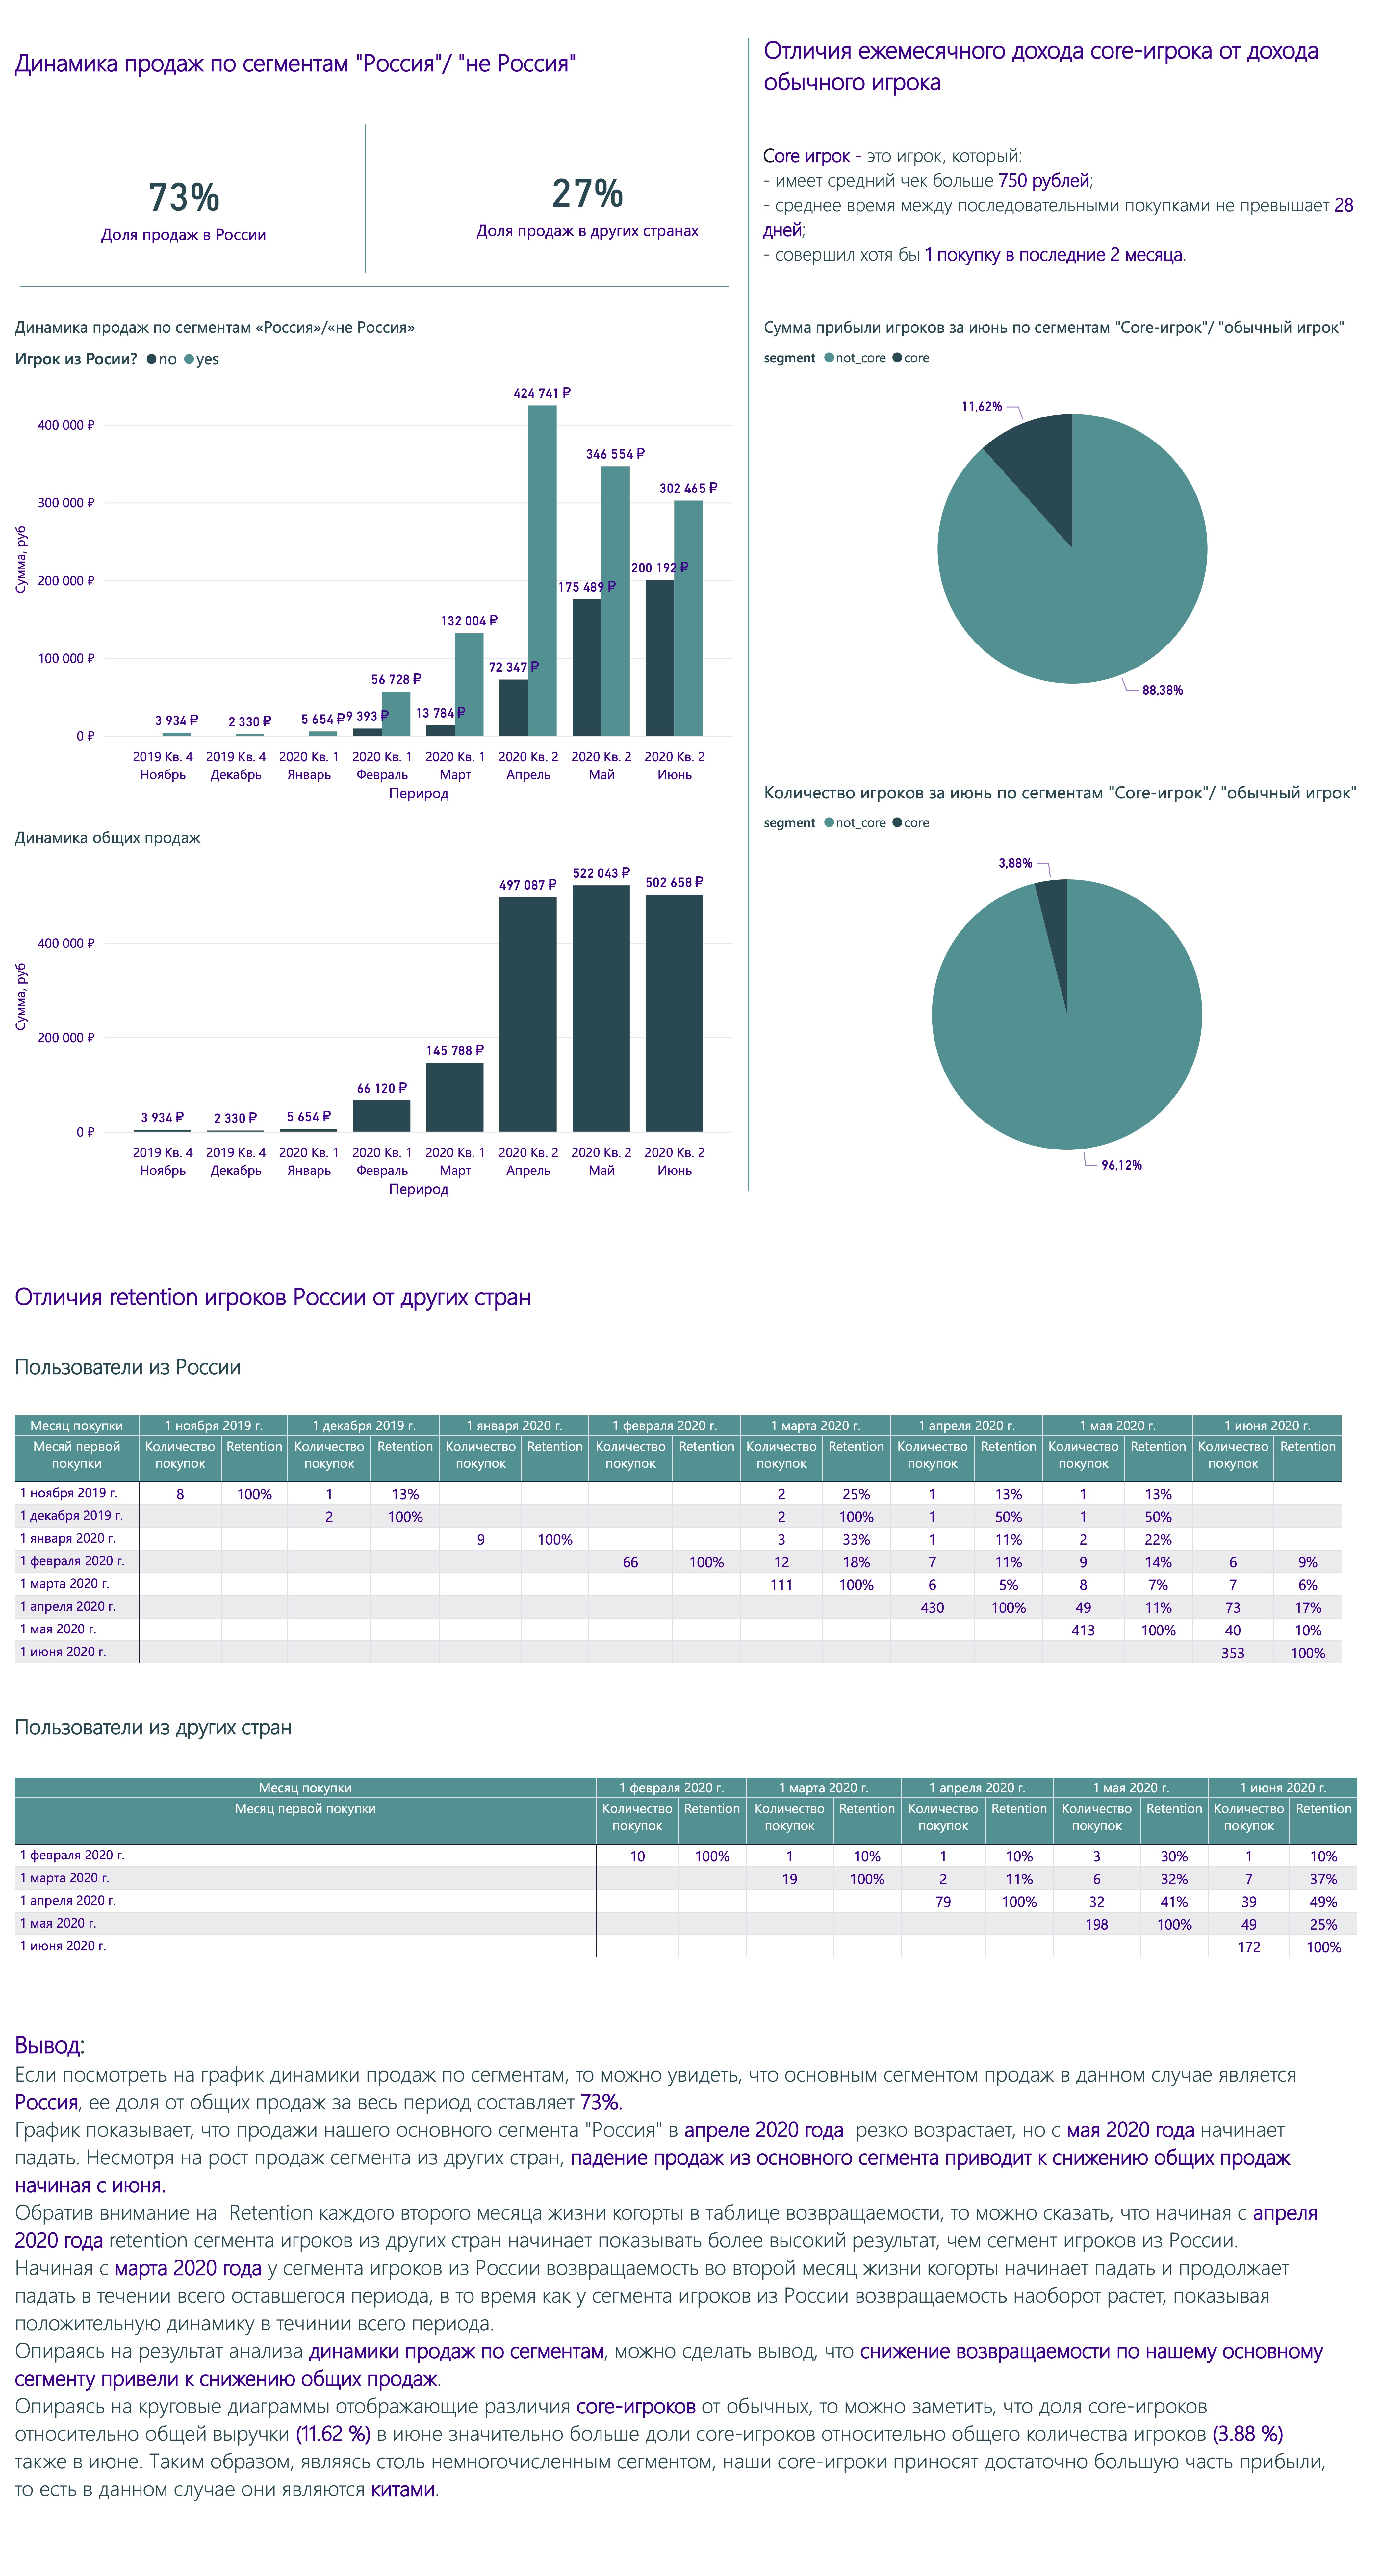
